In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA

In [6]:
X = np.genfromtxt('../datasets/Selective_descriptors_X')
Y = np.genfromtxt('../datasets/Selective_descriptors_Y').reshape((X.shape[0],1))
Y_error = np.genfromtxt('../datasets/Selective_descriptors_error')
X = StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test,e_train,e_test = train_test_split(X,Y,Y_error,test_size=0.10)

n_train = X_train.shape[0]
n_test = X_test.shape[0]
d = X_train.shape[1]
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)
print(e_train.shape,e_test.shape)

(2270, 21) (253, 21)
(2270, 1) (253, 1)
(2270,) (253,)


In [3]:
#initializing weight for first layer(w1) and second
#Parameters
hdnode = 100
w1 = np.random.normal(0,0.001,d*hdnode).reshape((d,hdnode))
d1 = np.zeros((d,hdnode))
w2 = np.random.normal(0,0.001,hdnode).reshape((hdnode,1))
d2 = np.zeros(hdnode)
h  = np.zeros(hdnode)
              
mb = 100 #minibatch size
m = int(n_train/mb)
batch = np.arange(m)
lr = 0.00020
EP =20000
y = np.zeros((mb,1))
yh = np.zeros((n_train,1))
yh2 = np.zeros((n_test,1))

L_train= np.zeros(EP+1)
L_test = np.zeros(EP+1)

L01_train = np.zeros((EP+1))
L01_test = np.zeros((EP+1))

#relu
"""def g(A):
    return (np.maximum(A,0))

def gd(A):
    return (np.minimum(np.maximum(A,0),1))"""
#tanh
def g(A):
    return (np.tanh(A))

def gd(A):
    return (1-np.square(np.tanh(A)))
ep = 0

In [4]:
EP = 20000
while ep < EP:
    ep += 1

    yh = g(X_train.dot(w1)).dot(w2)
    yh2 = g(X_test.dot(w1)).dot(w2)
        
    L_train[ep] = LA.norm(yh-Y_train)/n_train
    L_test[ep]  = LA.norm(yh2-Y_test)/n_test
    
    print(ep,L_train[ep],L_test[ep])
        
    np.random.shuffle(batch)
    for i in range(m):
        st = batch[i]*mb
        ed = (batch[i]+1)*mb
        
        h  = g(X_train[st:ed].dot(w1))
        y = h.dot(w2)

        d2 = h.T.dot(Y_train[st:ed]-y)
        d1 = X_train[st:ed].T.dot(np.multiply((Y_train[st:ed]-y).dot(w2.T),gd(X_train[st:ed].dot(w1))))
        
        w2 += lr*d2
        w1 += lr*d1

1 0.0665675286699 0.169541840832
2 0.0665559477051 0.169510539221
3 0.0664262023094 0.169160816828
4 0.0650470038731 0.16547694578
5 0.0589243289632 0.150146748261
6 0.0533232729527 0.138671591419
7 0.0514224071632 0.136841564951
8 0.0502403633321 0.134432269636
9 0.0479929949534 0.128015110791
10 0.0445214465324 0.118070272013
11 0.0404056563067 0.105686611536
12 0.0366808799567 0.0958580890322
13 0.0341039420488 0.0881712679388
14 0.032618984152 0.0843876187889
15 0.0318610512583 0.0818387951798
16 0.0315354777596 0.0810299840286
17 0.0313152255834 0.0811387474582
18 0.0311879428895 0.0805460893884
19 0.0310751626295 0.080185938538
20 0.0311352665464 0.0811436924048
21 0.0309637588044 0.0799732304645
22 0.0309710906499 0.0804686287546
23 0.030887952198 0.0792609032019
24 0.0308035393033 0.079370969309
25 0.030753307344 0.0792602630747
26 0.0307339740206 0.0794795923285
27 0.0306802218761 0.0795079370042
28 0.0307201998043 0.0789476212692
29 0.030596850247 0.0792620713714
30 0.0305727

KeyboardInterrupt: 

In [104]:
np.savetxt("w1_{}.txt".format(EP),w1)
np.savetxt("w2_{}.txt".format(EP),w2)
np.savetxt("L_train.txt",L_train)
np.savetxt("L_test.txt",L_test)
np.savetxt("prediction_train.txt",yh)
np.savetxt("prediction_test.txt",yh2)

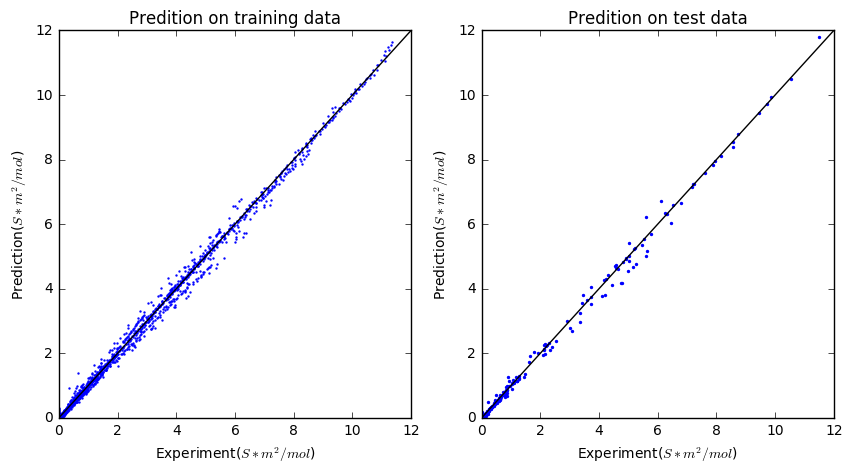

In [133]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y_train,yh,s=0.5,color='blue')
plt.title('Predition on training data')
plt.plot(np.linspace(0,12,1000),np.linspace(0,12,1000),color='black')
plt.xlim((0,12))
plt.ylim((0,12))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")

plt.subplot(1,2,2)
plt.scatter(Y_test,yh2,s=2,color='blue')
plt.title('Predition on test data')
plt.xlim((0,12))
plt.ylim((0,12))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")
plt.plot(np.linspace(0,12,1000),np.linspace(0,12,1000),color='black')
plt.show()

/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/prguser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


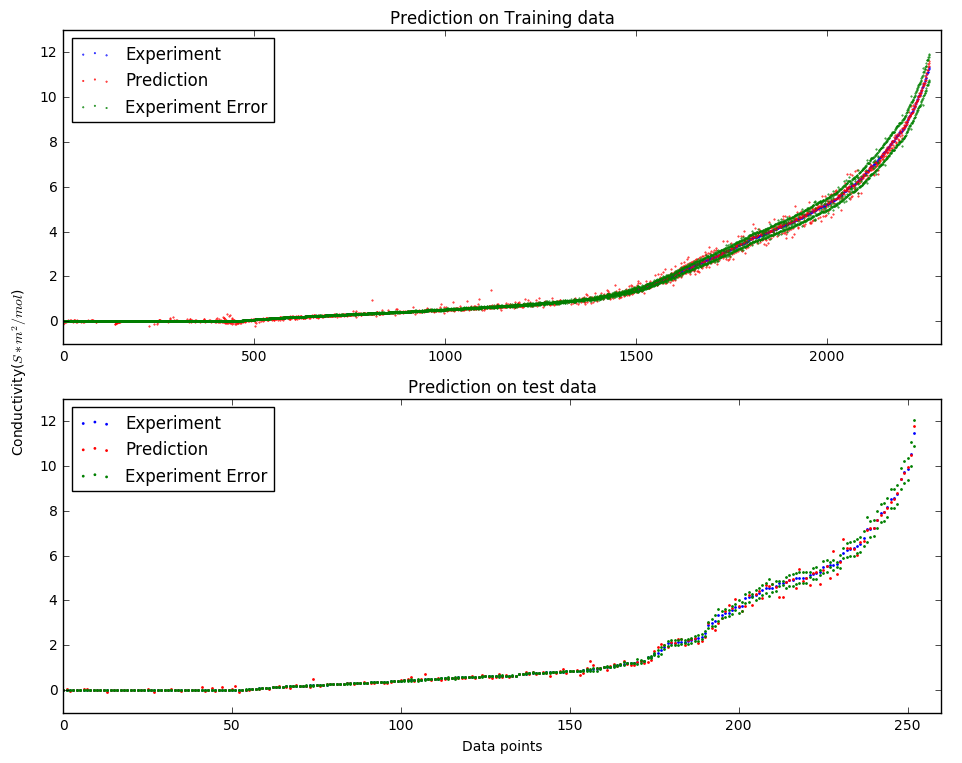

In [156]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

result = pd.DataFrame(columns=['Experiment','Prediction','error'])
result.Experiment = Y_train.reshape(n_train)
result.Prediction = yh.reshape((n_train,1))
result.error = e_train
result = result.sort(['Experiment','Prediction'],ascending=[1,1])
size=0.2

ax1.set_xlim((0,2300))
ax1.set_ylim((-1,13))
ax1.scatter(np.arange(X_train.shape[0]),result.Experiment,color="blue",s=size,label='Experiment')
ax1.scatter(np.arange(X_train.shape[0]),result.Prediction,color="red",s=size,label='Prediction')
ax1.scatter(np.arange(X_train.shape[0]),result.Experiment+result.error,color="green",s=size,label='Experiment Error')
ax1.scatter(np.arange(X_train.shape[0]),result.Experiment-result.error,color="green",s=size)
ax1.set_title('Prediction on Training data')
ax1.legend(loc='upper left')


result = pd.DataFrame(columns=['Experiment','Prediction','error'])
result.Experiment = Y_test.reshape(n_test)
result.Prediction = yh2
result.error = e_test
result = result.sort(['Experiment','Prediction'],ascending=[1,1])

size=1
ax2.set_xlim((0,260))
ax2.set_ylim((-1,13))
ax2.scatter(np.arange(X_test.shape[0]),result.Experiment,color="blue",s=size,label='Experiment')
ax2.scatter(np.arange(X_test.shape[0]),result.Prediction,color="red",s=size,label='Prediction')
ax2.scatter(np.arange(X_test.shape[0]),result.Experiment+result.error,color="green",s=size,label='Experiment Error')
ax2.scatter(np.arange(X_test.shape[0]),result.Experiment-result.error,color="green",s=size)
ax2.set_title('Prediction on test data')
ax2.legend(loc='upper left')

ax.set_xlabel('Data points')
ax.set_ylabel('Conductivity($S*m^2/mol$)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
fig.tight_layout()
plt.show()

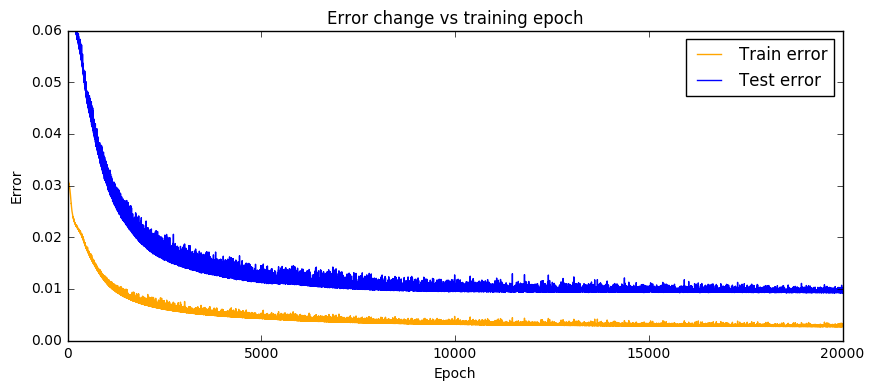

In [158]:
plt.figure(figsize=(10,4))
plt.xlim((0,ep))
plt.ylim((0,0.06))
plt.plot(np.linspace(1,ep,ep),L_train[:ep],c="orange",label='Train error')
plt.plot(np.linspace(1,ep,ep),L_test[:ep],c="blue",label='Test error')
plt.title("Error change vs training epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()